In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import unicodedata
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import prep
import acquire

In [2]:
df = acquire.bible_wrangle()

In [3]:
df.head(2)

,id,book_no,ch,ver,text,book,test,genre_no,genre
0,1001001,1,1,1,In the beginning God created the heavens and t...,Genesis,OT,1,Law
1,1001002,1,1,2,And the earth was waste and void; and darkness...,Genesis,OT,1,Law


In [4]:
df.text = df.text.apply(prep.basic_clean)
df.text = df.text.apply(prep.remove_stopwords)

In [5]:
df['stemmed'] = df.text.apply(prep.stem)

In [6]:
df.head(2)

,id,book_no,ch,ver,text,book,test,genre_no,genre,stemmed
0,1001001,1,1,1,beginning god created heavens earth,Genesis,OT,1,Law,begin god creat heaven earth
1,1001002,1,1,2,earth waste void darkness upon face deep spiri...,Genesis,OT,1,Law,earth wast void dark upon face deep spirit god...


In [7]:
sia = SentimentIntensityAnalyzer()

In [8]:
blob = "For God so loved the world that he gave his only son to die for us"

In [9]:
sia.polarity_scores(blob)

{'neg': 0.163, 'neu': 0.542, 'pos': 0.296, 'compound': 0.4924}

In [10]:
df['vader_sentiment'] = df.text.apply(lambda txt: sia.polarity_scores(txt)['compound'])

In [11]:
df.groupby('genre')['genre','vader_sentiment'].mean().sort_values(by='vader_sentiment',ascending=False)

,vader_sentiment
genre,
Epistles,0.205607
Wisdom,0.080120
Gospels,0.062539
History,0.055264
Law,0.035356
Prophets,0.014327


Text(0.5, 1.0, 'Bible mean sentiment of each genre')

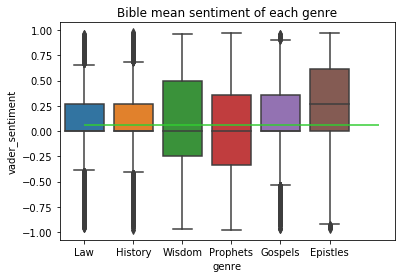

In [12]:
ax = sns.boxplot(x="genre", y="vader_sentiment", data=df)
#ax = sns.swarmplot(x="genre", y="vader_sentiment", data=df, color=".25")
plt.hlines(df['vader_sentiment'].mean(),0,6, color='limegreen')
plt.title("Bible mean sentiment of each genre")

In [44]:
df_book_avg = df.groupby('book')['book','book_no','vader_sentiment'].mean().sort_values(by='book_no')

In [45]:
df_book_avg

,book_no,vader_sentiment
book,,
Genesis,1,0.092322
Exodus,2,0.048060
Leviticus,3,-0.021380
Numbers,4,-0.039762
Deuteronomy,5,0.079937
Joshua,6,0.045335
Judges,7,0.014053
Ruth,8,0.076616
1 Samuel,9,0.033081


In [15]:
df_books = pd.DataFrame(df.groupby('book')['text'].apply(list))
df_books.text = df_books.text.apply(prep.text_join)

In [16]:
df_books.head()

,text
book,
1 Chronicles,adam seth enoshkenan mahalalel jaredenoch meth...
1 Corinthians,paul called ' apostle jesus christ god sosthen...
1 John,beginning heard seen eyes beheld hands handled...
1 Kings,king david old stricken years covered clothes ...
1 Peter,peter apostle jesus christ elect sojourners di...


In [21]:
df_chap = pd.DataFrame(df.groupby(['book','ch'])['text'].apply(list))
df_chap.text = df_chap.text.apply(prep.text_join)

In [23]:
df_chap['vader_sentiment'] = df_chap.text.apply(lambda txt: sia.polarity_scores(txt)['compound'])

In [33]:
df_chap.loc['Matthew']

,text,vader_sentiment
ch,,
1,book generation jesus christ son david son abr...,0.8402
2,jesus born bethlehem judaea days herod king be...,0.8979
3,days cometh john baptist preaching wilderness ...,0.9803
4,jesus led spirit wilderness tempted devilfaste...,0.9062
5,seeing multitudes went mountain sat disciples ...,0.9726
6,take heed ye righteousness men seen else ye re...,0.9899
7,judge ye judgedjudgment ye judge ye shall judg...,0.9413
8,come mountain great multitudes followedbehold ...,0.9776
9,entered boat crossed came citybehold brought m...,-0.3182


In [52]:
raw_count = pd.Series(" ".join(df_books.text).split()).value_counts()

Text(0.5, 1.0, '10 most common words')

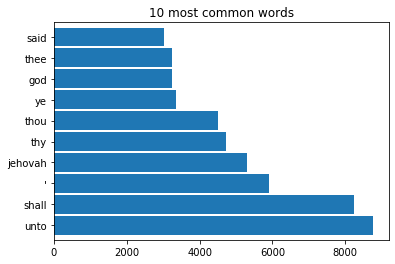

In [53]:
raw_count.sort_values(ascending=False)[0:10].plot.barh(width=.9)
plt.title('10 most common words')

In [56]:
df_books.text = df_books.text.apply(prep.remove_stopwords, args=(['said','thee','ye','thou','thy',"'",'shall','unto'],))

In [57]:
raw_count = pd.Series(" ".join(df_books.text).split()).value_counts()

Text(0.5, 1.0, '10 most common words')

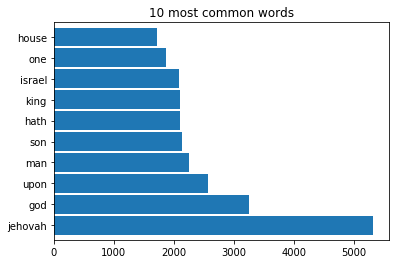

In [58]:
raw_count.sort_values(ascending=False)[0:10].plot.barh(width=.9)
plt.title('10 most common words')

In [63]:
df_gospels = df_books[df_books.index.isin(['John','Mark','Matthew','Luke'])]

In [67]:
df_gospels.text = df_gospels.text.apply(prep.remove_stopwords, args=(['said','thee','ye','thou','thy',"'",'shall','unto','things','say'],))

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [68]:
raw_count = pd.Series(" ".join(df_gospels.text).split()).value_counts()

Text(0.5, 1.0, '10 most common words')

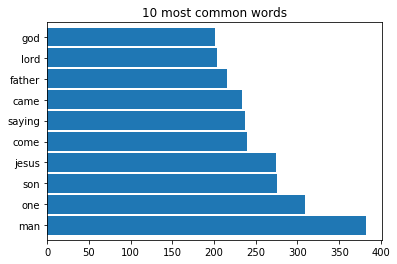

In [71]:
raw_count.sort_values(ascending=False)[0:10].plot.barh(width=.9)
plt.title('10 most common words')

In [75]:
df['vader'] = round(df.vader_sentiment,1)

In [153]:
df_likert = df.groupby(['book','sentiment_group_x'])['id'].count().reset_index()

In [92]:
df['sentiment_group'] = np.where(df.vader >= .7,'very positive',np.where(df.vader>=.1,'positive',np.where(df.vader == 0,'neutral',np.where(df.vader >= -.6,'negative','very negative'))))

In [97]:
verse_count = df.groupby('book').count()

In [103]:
verse_count.reset_index(inplace=True)

In [110]:
verse_count = verse_count[['book','sentiment_group']]

In [132]:
verse_count.head(2)

,book,sentiment_group
0,1 Chronicles,942
1,1 Corinthians,437


In [133]:
df_likert.head(2)

,book,sentiment_group_x,id
0,1 Chronicles,negative,66
1,1 Chronicles,neutral,645


In [112]:
df = pd.merge(df,verse_count,left_on='book',right_on = 'book')

In [154]:
df_likert_total = pd.merge(df_likert,verse_count,left_on='book',right_on='book')

In [155]:
df_likert_total['percent'] = round(df_likert_total.id/df_likert_total.sentiment_group,2)

In [158]:
df_likert_total.head(2)

,book,sentiment_group_x,id,sentiment_group,percent
0,1 Chronicles,negative,66,942,0.07
1,1 Chronicles,neutral,645,942,0.68


In [162]:
df_books = df.groupby('book')[['book','book_no']].mean()

In [167]:
df_books.sort_values(by='book_no')

,book_no
book,
Genesis,1
Exodus,2
Leviticus,3
Numbers,4
Deuteronomy,5
Joshua,6
Judges,7
Ruth,8
1 Samuel,9


In [170]:
df_likert_final = pd.merge(df_likert_total,df_books,left_on='book',right_on='book')

In [172]:
df_likert_final.columns = ['book','sentiment','sentiment_verses','total_verses','percent','book_no']

In [180]:
df_likert_final.percent = np.where(df_likert_final.sentiment == 'negative',df_likert_final.percent *-1,np.where(df_likert_final.sentiment=="very negative",df_likert_final.percent *-1,df_likert_final.percent))

In [194]:
df_likert_final = pd.merge(df_likert_final,df_book_num,left_on='book',right_on='field.1')

In [184]:
df_likert_final.to_csv("likert_final.csv",index=False)

In [199]:
pd.read_csv('likert_final.csv').sort_values(by='book_no')

,book,sentiment,sentiment_verses,total_verses,percent,book_no
143,Genesis,negative,213,1533,-0.14,1
144,Genesis,neutral,739,1533,0.48,1
145,Genesis,positive,401,1533,0.26,1
146,Genesis,very negative,47,1533,-0.03,1
147,Genesis,very positive,133,1533,0.09,1
127,Exodus,very positive,61,1213,0.05,2
126,Exodus,very negative,42,1213,-0.03,2
125,Exodus,positive,289,1213,0.24,2
124,Exodus,neutral,648,1213,0.53,2
123,Exodus,negative,173,1213,-0.14,2


,book,sentiment,sentiment_verses,total_verses,percent,book_no,field,field.1,field.2,field.3
50,2 John,negative,1,13,-0.08,63,63,2 John,NT,7
51,2 John,neutral,2,13,0.15,63,63,2 John,NT,7
52,2 John,positive,6,13,0.46,63,63,2 John,NT,7
53,2 John,very positive,4,13,0.31,63,63,2 John,NT,7


,field,field.1,field.2,field.3
0,1,Genesis,OT,1
1,2,Exodus,OT,1
2,3,Leviticus,OT,1
3,4,Numbers,OT,1
4,5,Deuteronomy,OT,1
5,6,Joshua,OT,2
6,7,Judges,OT,2
7,8,Ruth,OT,2
8,9,1 Samuel,OT,2
9,10,2 Samuel,OT,2
